# MSiA 432 - Deep Learning - Final Project
## Group: Alejandra Lelo de Larrea Ibarra, Bannasorn Paspanthong, Ruben Nakano, Samuel Swain
# Style Transfering: Palpatine
Reference: https://anderfernandez.com/en/blog/how-to-code-neural-style-transfer-in-python/

In [1]:
# Import libraries 
from datetime import datetime
import tensorflow as tf
import numpy as np
from PIL import Image as im 

import keras
from keras import Model
from keras.utils import get_file, plot_model
from keras.optimizers import SGD
from tensorflow.keras.applications import vgg19, vgg16

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

from pathlib import Path
import style_transfering as st

In [2]:
# Try to activate GPUs 
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print (f'Found GPU at {device_name}')

Found GPU at /device:GPU:0
Metal device set to: Apple M1 Pro


In [3]:
# --- Common Parameters for all experiments ---

# Select base and style image
base_path = Path("../02_Data/face_age/010/755.png")
style_path = Path("../02_Data/Palpatine.jpeg")

# Define layers to extract for the style and content 
style_layers = ["block1_conv1", "block2_conv1", "block3_conv1", "block4_conv1", "block5_conv1",]
content_layers = ["block5_conv2"]

# Select pre-trained model
mod_name = "vgg19"
model = vgg19.VGG19(weights="imagenet", include_top=False)

# Dictionary of layers in the model: map layer names to outputs
outputs_dict= dict([(layer.name, layer.output) for layer in model.layers])

# New model: same model inputs, outputs as specified in outputs_dict
feature_extractor = Model(inputs = model.inputs, outputs = outputs_dict)

# Set optimization parameters
learning_rate = 100.0
decay_steps = 100
decay_rate = 0.96
n_iter = 5000

2023-05-14 08:52:49.063581: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Iteration 100: loss=4071.13
Iteration 200: loss=2834.73
Iteration 300: loss=2334.43
Iteration 400: loss=2049.59
Iteration 500: loss=1857.15
Iteration 600: loss=1717.02
Iteration 700: loss=1609.53
Iteration 800: loss=1524.24
Iteration 900: loss=1454.50
Iteration 1000: loss=1395.12
Iteration 1100: loss=1344.41
Iteration 1200: loss=1300.19
Iteration 1300: loss=1261.16
Iteration 1400: loss=1226.49
Iteration 1500: loss=1195.79
Iteration 1600: loss=1168.36
Iteration 1700: loss=1143.26
Iteration 1800: loss=1120.39
Iteration 1900: loss=1099.51
Iteration 2000: loss=1080.42
Iteration 2100: loss=1062.86
Iteration 2200: loss=1046.69
Iteration 2300: loss=1031.71
Iteration 2400: loss=1017.82
Iteration 2500: loss=1004.91
Iteration 2600: loss=992.82
Iteration 2700: loss=981.48
Iteration 2800: loss=970.77
Iteration 2900: loss=960.65
Iteration 3000: loss=951.23
Iteration 3100: loss=942.39
Iteration 3200: loss=934.06
Iteration 3300: loss=926.21
Iteration 3400: loss=918.79
Iteration 3500: loss=911.84
Iter

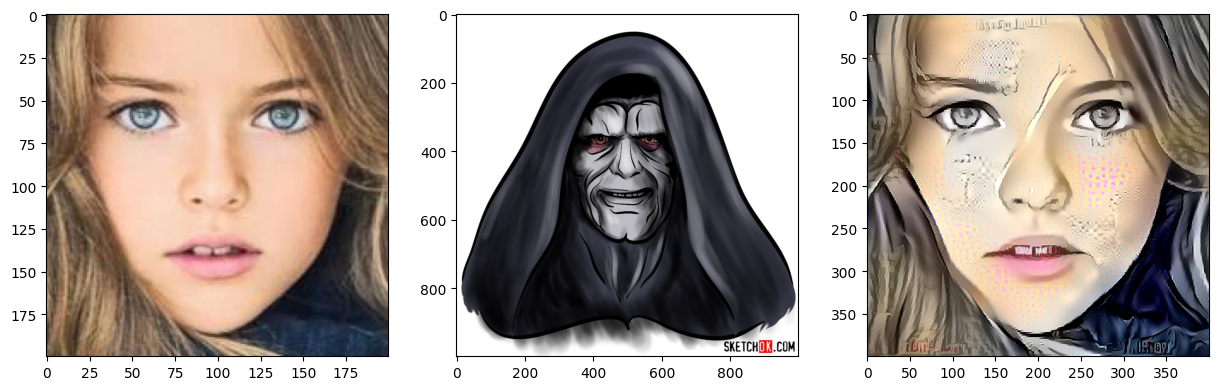

In [4]:
# --- Experiment 1: ----
final_img_path= Path("Results/Starwars/Palpatine_E1.png")
style_weight = 1e-6
content_weight = 2.5e-8

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()


Iteration 100: loss=654.04
Iteration 200: loss=543.84
Iteration 300: loss=484.46
Iteration 400: loss=444.50
Iteration 500: loss=415.16
Iteration 600: loss=392.68
Iteration 700: loss=374.61
Iteration 800: loss=359.67
Iteration 900: loss=347.05
Iteration 1000: loss=336.26
Iteration 1100: loss=326.97
Iteration 1200: loss=318.82
Iteration 1300: loss=311.61
Iteration 1400: loss=305.23
Iteration 1500: loss=299.54
Iteration 1600: loss=294.42
Iteration 1700: loss=289.76
Iteration 1800: loss=285.57
Iteration 1900: loss=281.75
Iteration 2000: loss=278.27
Iteration 2100: loss=275.07
Iteration 2200: loss=272.13
Iteration 2300: loss=269.43
Iteration 2400: loss=266.94
Iteration 2500: loss=264.61
Iteration 2600: loss=262.45
Iteration 2700: loss=260.44
Iteration 2800: loss=258.57
Iteration 2900: loss=256.82
Iteration 3000: loss=255.18
Iteration 3100: loss=253.65
Iteration 3200: loss=252.21
Iteration 3300: loss=250.85
Iteration 3400: loss=249.59
Iteration 3500: loss=248.39
Iteration 3600: loss=247.26
I

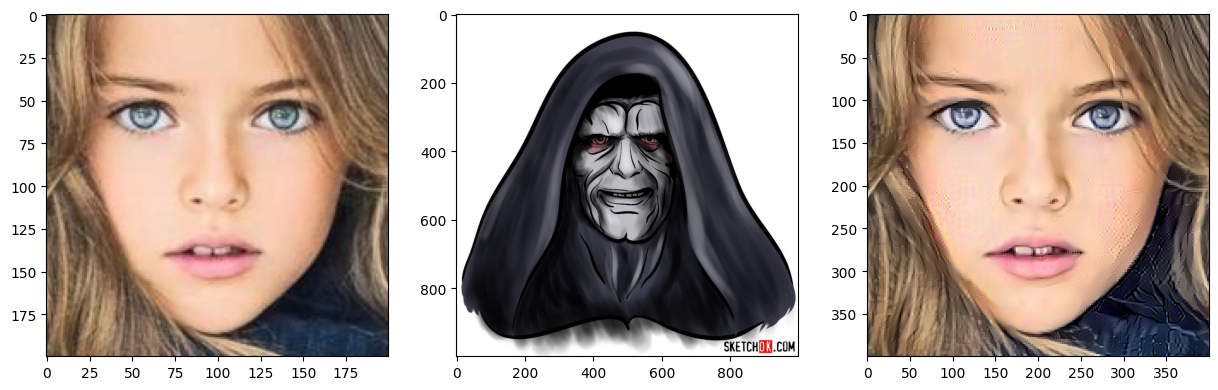

In [5]:
# --- Experiment 2: ----
final_img_path= Path("Results/Starwars/Palpatine_E2.png")
style_weight = 2.5e-8
content_weight = 1e-6

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()

Iteration 100: loss=4570.52
Iteration 200: loss=3321.14
Iteration 300: loss=2793.42
Iteration 400: loss=2497.08
Iteration 500: loss=2297.61
Iteration 600: loss=2152.29
Iteration 700: loss=2039.47
Iteration 800: loss=1948.74
Iteration 900: loss=1873.10
Iteration 1000: loss=1809.15
Iteration 1100: loss=1754.00
Iteration 1200: loss=1706.24
Iteration 1300: loss=1664.75
Iteration 1400: loss=1628.02
Iteration 1500: loss=1594.99
Iteration 1600: loss=1565.25
Iteration 1700: loss=1538.58
Iteration 1800: loss=1514.45
Iteration 1900: loss=1492.37
Iteration 2000: loss=1471.87
Iteration 2100: loss=1452.86
Iteration 2200: loss=1435.25
Iteration 2300: loss=1419.06
Iteration 2400: loss=1404.09
Iteration 2500: loss=1390.22
Iteration 2600: loss=1377.33
Iteration 2700: loss=1365.25
Iteration 2800: loss=1353.85
Iteration 2900: loss=1343.16
Iteration 3000: loss=1333.12
Iteration 3100: loss=1323.71
Iteration 3200: loss=1314.86
Iteration 3300: loss=1306.54
Iteration 3400: loss=1298.71
Iteration 3500: loss=12

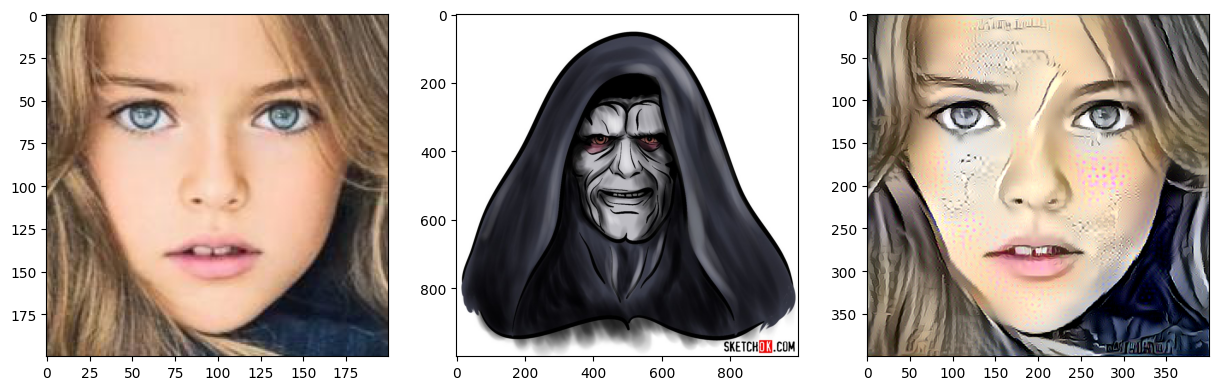

In [6]:
# --- Experiment 3: ----
final_img_path= Path("Results/Starwars/Palpatine_E3.png")
style_weight = 1e-6
content_weight = 1e-6

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()

Iteration 100: loss=520.69
Iteration 200: loss=416.08
Iteration 300: loss=359.68
Iteration 400: loss=322.16
Iteration 500: loss=294.87
Iteration 600: loss=273.98
Iteration 700: loss=257.64
Iteration 800: loss=244.41
Iteration 900: loss=233.45
Iteration 1000: loss=224.18
Iteration 1100: loss=216.25
Iteration 1200: loss=209.40
Iteration 1300: loss=203.40
Iteration 1400: loss=198.09
Iteration 1500: loss=193.38
Iteration 1600: loss=189.14
Iteration 1700: loss=185.33
Iteration 1800: loss=181.88
Iteration 1900: loss=178.76
Iteration 2000: loss=175.92
Iteration 2100: loss=173.31
Iteration 2200: loss=170.91
Iteration 2300: loss=168.70
Iteration 2400: loss=166.66
Iteration 2500: loss=164.77
Iteration 2600: loss=163.03
Iteration 2700: loss=161.40
Iteration 2800: loss=159.90
Iteration 2900: loss=158.49
Iteration 3000: loss=157.17
Iteration 3100: loss=155.93
Iteration 3200: loss=154.78
Iteration 3300: loss=153.69
Iteration 3400: loss=152.67
Iteration 3500: loss=151.71
Iteration 3600: loss=150.81
I

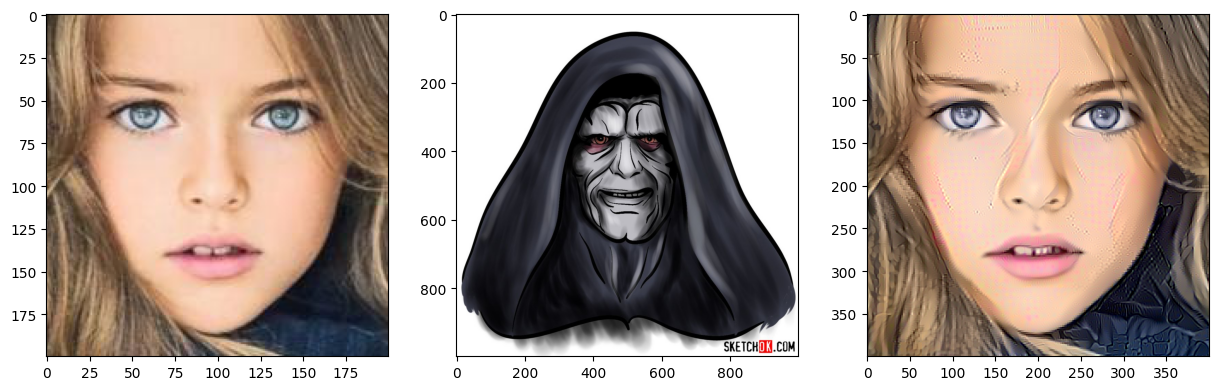

In [7]:
# --- Experiment 4: ----
final_img_path= Path("Results/Starwars/Palpatine_E4.png")
style_weight = 2.5e-8
content_weight = 2.5e-8

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()

Iteration 100: loss=1757.21
Iteration 200: loss=1240.43
Iteration 300: loss=1014.91
Iteration 400: loss=884.20
Iteration 500: loss=796.99
Iteration 600: loss=733.09
Iteration 700: loss=684.00
Iteration 800: loss=645.14
Iteration 900: loss=613.65
Iteration 1000: loss=587.38
Iteration 1100: loss=564.87
Iteration 1200: loss=545.37
Iteration 1300: loss=528.58
Iteration 1400: loss=513.95
Iteration 1500: loss=501.06
Iteration 1600: loss=489.61
Iteration 1700: loss=479.31
Iteration 1800: loss=470.05
Iteration 1900: loss=461.66
Iteration 2000: loss=454.06
Iteration 2100: loss=447.13
Iteration 2200: loss=440.82
Iteration 2300: loss=435.01
Iteration 2400: loss=429.68
Iteration 2500: loss=424.75
Iteration 2600: loss=420.19
Iteration 2700: loss=415.98
Iteration 2800: loss=412.06
Iteration 2900: loss=408.43
Iteration 3000: loss=405.05
Iteration 3100: loss=401.90
Iteration 3200: loss=398.95
Iteration 3300: loss=396.18
Iteration 3400: loss=393.58
Iteration 3500: loss=391.13
Iteration 3600: loss=388.8

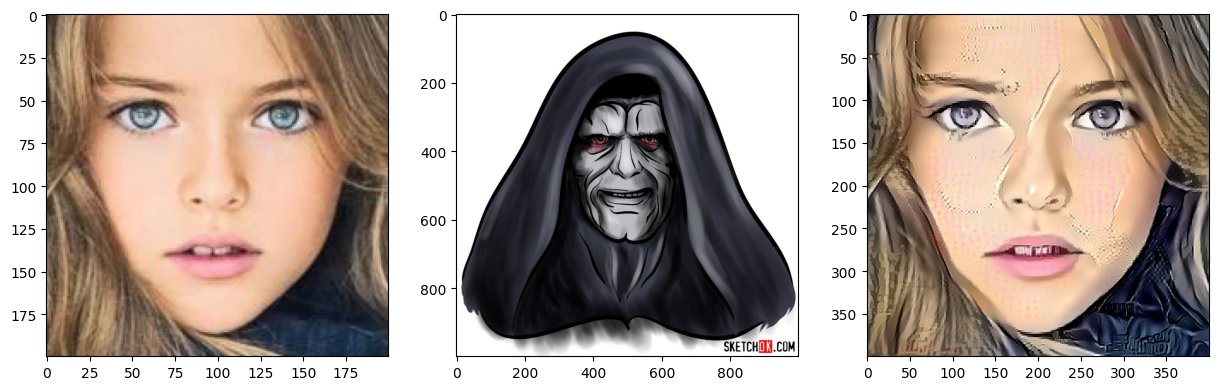

In [8]:
# --- Experiment 5: ----
final_img_path= Path("Results/Starwars/Palpatine_E5.png")
style_weight = 2e-7
content_weight = 1e-10

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()